In [38]:
import pickle
import os
import pandas as pd
from collections import defaultdict
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def load_pickle(file_path,add_data_path=True):
        if add_data_path:
            file_path=os.path.join(file_path,'data/results')
            
        
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
        return data

def get_performance_ratio(distributions):
    print(distributions)
    df=defaultdict(list)

    for distribution in distributions:




    # distribution='SK_spin_70_100vertices_weighted'
    # distribution='dense_MC_100_200vertices_unweighted'
    # distribution='planar_800vertices_unweighted'
    # distribution='planar_800vertices_weighted'
    # distribution='rnd_graph_800vertices_unweighted'
    # distribution='rnd_graph_800vertices_weighted'
    # distribution='rnd_graph_1000vertices_unweighted'
    # distribution='rnd_graph_2000vertices_unweighted'
    # distribution='rnd_graph_2000vertices_weighted'
    # distribution='ER_200'


    
        

        
        

        try:
            heurestics = load_pickle(f'pretrained agents/{distribution}_heuristics')
            
            df['Greedy'] += heurestics['SG'].to_list()
            df['MCA'] += heurestics['MCA'].to_list()
            df['TS'] += heurestics['TS'].to_list()
        except Exception as e:
            print(f"An error occurred while loading 'heuristics' results: {e}")
            heurestics = None
            
        try:
            S2V_results = load_pickle(f'pretrained agents/{distribution}_S2V')['cut']
            df['S2V-DQN'] += S2V_results.to_list()
        except Exception as e:
            print(f"An error occurred while loading 'S2V-DQN' results: {e}")
            S2V_results = None

        # try:
        #     RUN_CSP = load_pickle(f'../RUN-CSP/models/{distribution}')['Best Cut']
        #     df['RUN-CSP'] += RUN_CSP.to_list()
        # except Exception as e:
        #     print(f"An error occurred while loading 'RUN-CSP' results: {e}")
        #     RUN_CSP = None

        try:
            RUNCSP_PyTorch_results = load_pickle(f'../RUNCSP/pretrained agents/{distribution}/data/results',add_data_path=False)['cut']
            df['RUN-CSP'] += RUNCSP_PyTorch_results.to_list()
        except Exception as e:
            print(f"An error occurred while loading RUNCSP_PyTorch 'results': {e}")
            ECORD_det_results = None

        try:
            Gflow = load_pickle(f'../gflow/pretrained_agents/{distribution}')['cut']
            df['Gflow-CombOpt'] += Gflow.to_list()
        except Exception as e:
            print(f"An error occurred while loading 'Gflow' results: {e}")
            Gflow = None
        try:
            LSDQN_results = load_pickle(f'pretrained agents/{distribution}_LSDQN')['cut']
            df['LS-DQN'] += LSDQN_results.to_list()
        except Exception as e:
            print(f"An error occurred while loading 'LS-DQN' results: {e}")
            LSDQN_results = None

        try:
            OPT = load_pickle(f'../data/testing/{distribution}/optimal', add_data_path=False)['OPT']
            df['OPT'] += OPT.to_list()
        except Exception as e:
            print(f"An error occurred while loading 'OPT' results: {e}")
            OPT = None

        try:
            ECO_results = load_pickle(f'pretrained agents/{distribution}_ECO_DQN')['cut']
            df['ECO-DQN'] += ECO_results.to_list()
        except Exception as e:
            print(f"An error occurred while loading 'ECO-DQN' results: {e}")
            ECO_results = None

        

        try:
            LR_results = load_pickle(f'pretrained agents/{distribution}_LinearRegression')['cut']
            df['SoftTabu'] += LR_results.to_list()
        except Exception as e:
            print(f"An error occurred while loading 'LinearRegression' results: {e}")
            LSDQN_results = None

        



        try:
            ECORD_det_results = load_pickle(f'../ecord/pretrained_agents/{distribution}_ECORD/data/results_det',add_data_path=False)['cut']
            df['ECORD_det'] += ECORD_det_results.to_list()
        except Exception as e:
            print(f"An error occurred while loading 'ECORD-det' results: {e}")
            ECORD_det_results = None

        

        try:
            ECORD_results = load_pickle(f'../ecord/pretrained_agents/{distribution}_ECORD')['cut']
            df['ECORD'] += ECORD_results.to_list()
        except Exception as e:
            print(f"An error occurred while loading 'ECORD' results: {e}")
            ECORD_results = None

        try:
            ANYCSP_results = load_pickle(f'../ANYCSP/pretrained agents/{distribution}')['cut']
            df['ANYCSP'] += ANYCSP_results.to_list()
        except Exception as e:
            print(f"An error occurred while loading 'Anycsp' results: {e}")
            ANYCSP_results = None

    df=pd.DataFrame(df)

    return df


In [39]:
# df=get_performance_ratio(distributions=['rnd_graph_800vertices_unweighted'])
df=get_performance_ratio(distributions=['WattsStrogatz_200vertices_unweighted'])

# df=get_performance_ratio(distributions=['HomleKim_200vertices_unweighted'])


# df=get_performance_ratio(distributions=['planar_800vertices_unweighted'])
# df=get_performance_ratio(distributions=['dense_MC_100_200vertices_unweighted'])
# df=get_performance_ratio(distributions=['ER_200'])
# df=get_performance_ratio(distributions=['BA_200'])
# df=get_performance_ratio(distributions=['WattsStrogatz_200vertices_weighted'])
# df=get_performance_ratio(distributions=['HomleKim_200vertices_weighted'])
# df=get_performance_ratio(distributions=['rnd_graph_800vertices_weighted'])
# df=get_performance_ratio(distributions=['planar_800vertices_weighted'])
# df=get_performance_ratio(distributions=['toroidal_grid_2D_800vertices_weighted'])
# df=get_performance_ratio(distributions=['wishart_100vertices_m50'])

# df=get_performance_ratio(distributions=['SK_spin_70_100vertices_weighted'])

# df=get_performance_ratio(distributions=['Physics'])

# print(df)
# Normalize each row by the maximum value in that row
df ['AHC']=df.max(axis=1)
df_normalized = df.div(df.max(axis=1), axis=0)

# Calculate the mean of each column
column_means = df_normalized.mean()

# print("DataFrame after normalization by row maximum:")
# print(df_normalized)
print("\nMean of each column:")
print(column_means.round(3))

['WattsStrogatz_200vertices_unweighted']

Mean of each column:
Greedy           0.944
MCA              0.943
TS               0.996
S2V-DQN          0.977
RUN-CSP          0.988
Gflow-CombOpt    0.972
LS-DQN           0.988
OPT              0.998
ECO-DQN          0.996
SoftTabu         0.996
ECORD_det        0.998
ECORD            0.971
ANYCSP           1.000
AHC              1.000
dtype: float64


['HomleKim_200vertices_unweighted']
An error occurred while loading 'OPT' results: [Errno 2] No such file or directory: '../data/testing/HomleKim_200vertices_unweighted/optimal'
['ER_200']
['BA_200']
['planar_800vertices_weighted']


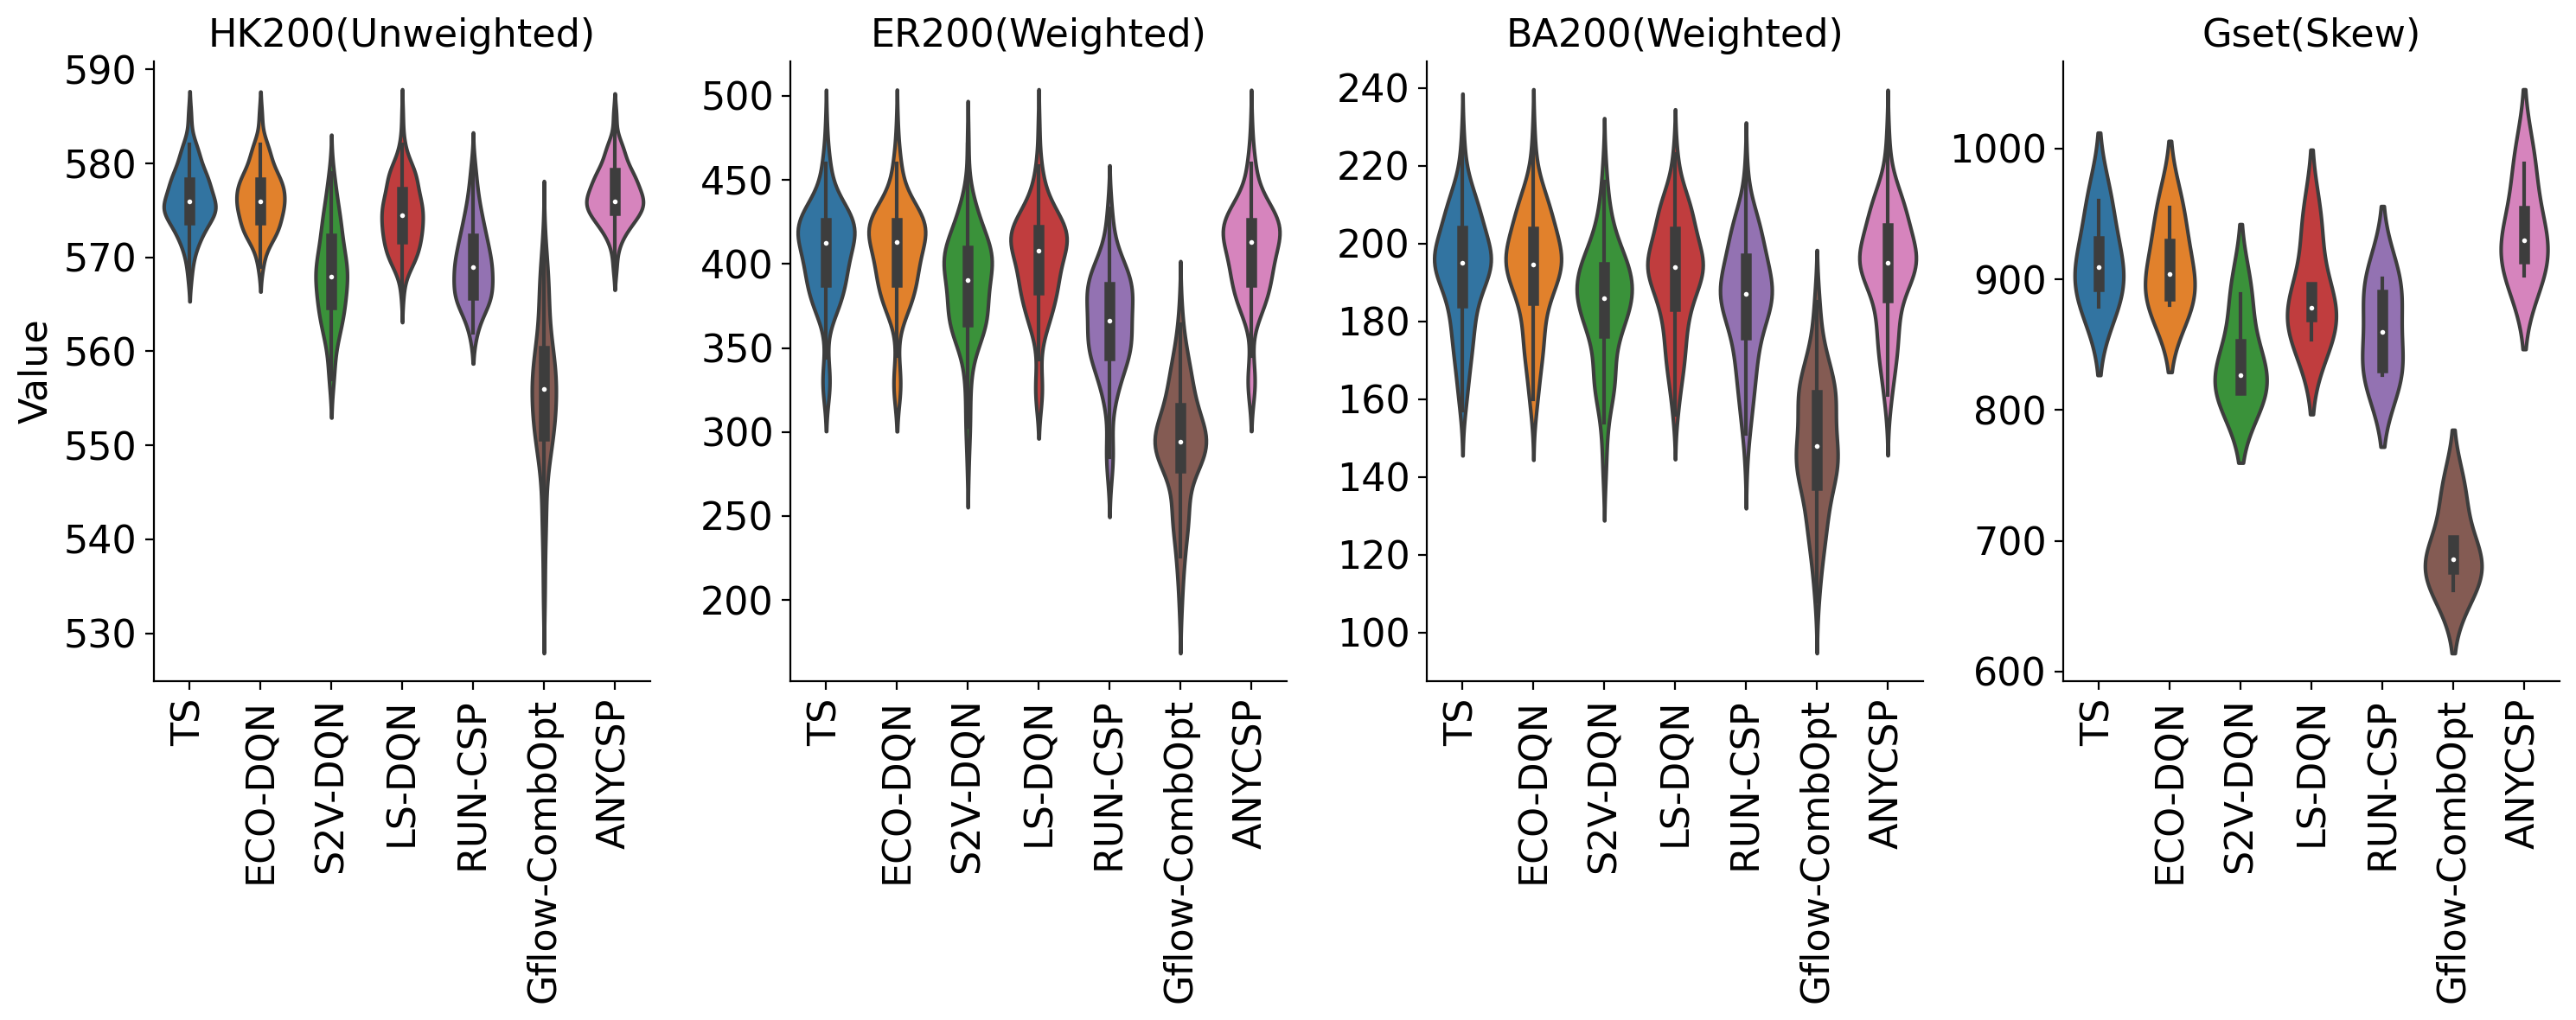

In [40]:
# distributions = ['WattsStrogatz_200vertices_unweighted', 'HomleKim_200vertices_unweighted','ER_200','BA_200']

# distributions = ['WattsStrogatz_200vertices_unweighted', 'HomleKim_200vertices_unweighted','ER_200','BA_200','planar_800vertices_weighted']
distributions = ['HomleKim_200vertices_unweighted','ER_200','BA_200','planar_800vertices_weighted']

mapping={
    'WattsStrogatz_200vertices_unweighted':'WS200(Unweighted)',
    'HomleKim_200vertices_unweighted':'HK200(Unweighted)',
    'ER_200':'ER200(Weighted)',
    'BA_200':'BA200(Weighted)',
    'planar_800vertices_weighted':'Gset(Skew)'

}
# selected_columns = ['TS','ECO-DQN','S2V-DQN','LS-DQN','RUN-CSP','AHC','Gflow-CombOpt', 'ANYCSP']
selected_columns = ['TS','ECO-DQN','S2V-DQN','LS-DQN','RUN-CSP','Gflow-CombOpt', 'ANYCSP']

# Set font size parameter
font_size = 16


# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(distributions), figsize=(15, 6), dpi=200)

for i, (ax, distribution) in enumerate(zip(axes, distributions)):
    df = get_performance_ratio(distributions=[distribution])
    df ['AHC']=df.max(axis=1)
    df_clean = df[selected_columns]
    df_long = pd.melt(df_clean, var_name='Algorithms', value_name='Value')

    sns.violinplot(x='Algorithms', y='Value', data=df_long, fill=False, ax=ax)
    sns.despine(ax=ax, top=True, right=True)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=font_size)
     # Set y-axis tick labels font size
    ax.tick_params(axis='y', labelsize=font_size)
    # ax.set_yticklabels(ax.get_yticklabels(),  fontsize=font_size)
    ax.set_title(f'{mapping[distribution]}', fontsize=font_size)

    # Remove x-axis title
    ax.set_xlabel('')

    # Only the first subplot should have a y-axis title
    if i == 0:
        ax.set_ylabel('Value', fontsize=font_size)
    else:
        ax.set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.savefig(f'violin_plot.pdf',format='pdf', dpi=500,bbox_inches='tight')
plt.show()
    
    

In [60]:
df

,Greedy,MCA,TS,S2V-DQN,RUN-CSP,Gflow-CombOpt,LS-DQN,OPT,ECO-DQN,SoftTabu,ECORD_det,ECORD,ANYCSP,AHC
0,151.0,166.0,184.0,172.0,177.0,123.0,182.0,184.0,184.0,184.0,184.0,183.0,184.0,184.0
1,173.0,175.0,190.0,185.0,184.0,151.0,190.0,192.0,191.0,192.0,190.0,191.0,192.0,192.0
2,133.0,158.0,178.0,162.0,173.0,131.0,178.0,184.0,178.0,178.0,178.0,178.0,178.0,184.0
3,185.0,183.0,198.0,192.0,188.0,153.0,196.0,198.0,198.0,198.0,195.0,194.0,198.0,198.0
4,171.0,178.0,194.0,192.0,187.0,143.0,194.0,194.0,194.0,194.0,194.0,194.0,194.0,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,155.0,164.0,185.0,177.0,177.0,142.0,185.0,187.0,187.0,187.0,187.0,185.0,187.0,187.0
96,171.0,184.0,202.0,197.0,189.0,160.0,199.0,202.0,202.0,201.0,202.0,200.0,202.0,202.0
97,139.0,153.0,169.0,164.0,161.0,108.0,168.0,184.0,171.0,171.0,171.0,169.0,171.0,184.0
98,170.0,170.0,194.0,190.0,185.0,141.0,194.0,194.0,194.0,194.0,194.0,194.0,194.0,194.0
